<a href="https://colab.research.google.com/github/chellabeatrixkiddo/ML_and_DL/blob/master/CV_AnalyticsVidhya/age_prediction/age_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Conv2D, Flatten, MaxPool2D, GlobalMaxPool2D
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# read the label information into dataframes

traindata = pd.read_csv('/content/drive/My Drive/DLDatasets/CV101/datasets/age_prediction/train.csv')
testdata= pd.read_csv('/content/drive/My Drive/DLDatasets/CV101/datasets/age_prediction/test.csv')


In [4]:
traindata.shape, testdata.shape

((13911, 2), (5962, 1))

In [0]:
# read the images as a list of numpy arrays

X_train = []
X_test = []

traincount = 0
testcount = 0

for imgname in traindata.image_names:
  img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/age_prediction/images/' + imgname)
  X_train.append(img)
  traincount += 1
  if traincount == 3000:
    break
  
for imgname in testdata.image_names:
  img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/age_prediction/images/' + imgname)
  X_test.append(img)
  testcount += 1
  if testcount == 1000:
    break

# convert into a single numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)

             

In [6]:
X_train.shape, X_test.shape

((3000, 128, 128, 3), (1000, 128, 128, 3))

In [0]:
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

y_train = traindata.loc[:2999]['age_labels'].values

In [8]:
y_train.shape

(3000,)

In [39]:
model = Sequential()
    
model.add(InputLayer(input_shape=(128, 128, 3)))

model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mse', optimizer="adam", metrics=['mse', 'mae'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 512)               0         
__________

In [40]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 50, validation_split = 0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/50
2400/2400 [==============================] - 35s 15ms/step - loss: 269.7604 - mean_squared_error: 269.7604 - mean_absolute_error: 12.6102 - val_loss: 130.1491 - val_mean_squared_error: 130.1491 - val_mean_absolute_error: 8.9135
Epoch 2/50
2400/2400 [==============================] - 35s 15ms/step - loss: 101.4062 - mean_squared_error: 101.4062 - mean_absolute_error: 8.2315 - val_loss: 94.5866 - val_mean_squared_error: 94.5866 - val_mean_absolute_error: 7.8347
Epoch 3/50
2400/2400 [==============================] - 35s 15ms/step - loss: 96.0948 - mean_squared_error: 96.0948 - mean_absolute_error: 8.0647 - val_loss: 93.7787 - val_mean_squared_error: 93.7787 - val_mean_absolute_error: 7.8127
Epoch 4/50
2400/2400 [==============================] - 35s 15ms/step - loss: 95.7695 - mean_squared_error: 95.7695 - mean_absolute_error: 8.0350 - val_loss: 89.5475 - val_mean_squared_error: 89.5475 - val_mean_absolute_error: 7.8848
Epoch 5/50

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


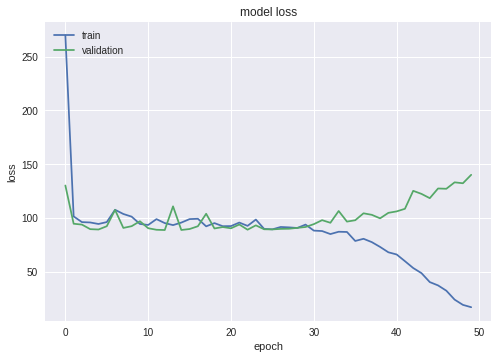

In [41]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

After about 30 iterations model seems to overfit.

In [0]:
# Predict the age for test set data

predictions = model.predict(X_test)

# Predict the age for a validation set

_, X_valid, _, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

predictions_valid = model.predict(X_valid)

rng = np.random.RandomState(42)
_, images_valid, _, y_valid = train_test_split(traindata.loc[:2999]['image_names'].values, y_train, test_size=0.3, random_state=42)


Predicted Age: [23] Actual Age: [23]


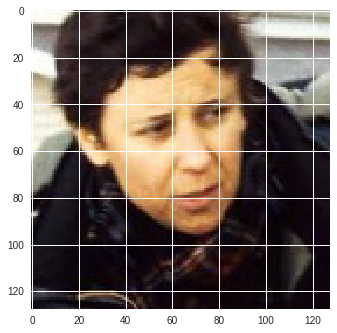

In [46]:
# Randomly display an image from the validation set and give it true age value and predicted age value

imgname = rng.choice(images_valid)
img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/age_prediction/images/' + imgname)

predicted_age = (predictions_valid).astype(int)[np.where(images_valid == imgname)[0][0]]
actual_age = (y_valid).astype(int)[np.where(images_valid == imgname)[0]]

print('Predicted Age:', predicted_age, 'Actual Age:', actual_age)
plt.imshow(img)


In [0]:
np.unique(predictions_valid)

 Since the loss curves for training and validation data showed an overfitting trend, we stop the training at 30 iterations and then check for the loss.

In [53]:
history = model.fit(X_train, y_train, epochs = 30, batch_size = 50, validation_split = 0.2)

Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 94s 39ms/step - loss: 362.4577 - mean_squared_error: 362.4577 - mean_absolute_error: 15.0567 - val_loss: 124.0959 - val_mean_squared_error: 124.0959 - val_mean_absolute_error: 8.9503
Epoch 2/30
2400/2400 [==============================] - 90s 38ms/step - loss: 128.3831 - mean_squared_error: 128.3831 - mean_absolute_error: 9.1361 - val_loss: 118.4740 - val_mean_squared_error: 118.4740 - val_mean_absolute_error: 9.1830
Epoch 3/30
2400/2400 [==============================] - 90s 38ms/step - loss: 109.4472 - mean_squared_error: 109.4472 - mean_absolute_error: 8.5199 - val_loss: 94.6998 - val_mean_squared_error: 94.6998 - val_mean_absolute_error: 8.1533
Epoch 4/30
2400/2400 [==============================] - 90s 38ms/step - loss: 104.7141 - mean_squared_error: 104.7141 - mean_absolute_error: 8.3821 - val_loss: 92.8708 - val_mean_squared_error: 92.8708 - val_mean_absolute_error: 7.8508
Epoc

In [0]:
# Predict the age for test set data

predictions = model.predict(X_test)

# Predict the age for a validation set

_, X_valid, _, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

predictions_valid = model.predict(X_valid)

rng = np.random.RandomState(42)
_, images_valid, _, y_valid = train_test_split(traindata.loc[:2999]['image_names'].values, y_train, test_size=0.3, random_state=42)


In [0]:
np.unique(predictions)

Predicted Age: [34] Actual Age: [29]


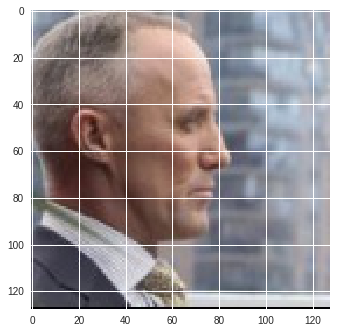

In [61]:
# Randomly display an image from the validation set and give it true age value and predicted age value

imgname = rng.choice(images_valid)
img = plt.imread('/content/drive/My Drive/DLDatasets/CV101/datasets/age_prediction/images/' + imgname)

predicted_age = (predictions_valid).astype(int)[np.where(images_valid == imgname)[0][0]]
actual_age = (y_valid).astype(int)[np.where(images_valid == imgname)[0]]

print('Predicted Age:', predicted_age, 'Actual Age:', actual_age)
plt.imshow(img)
